In [14]:
import numpy as np
from sklearn import linear_model, preprocessing, pipeline
import matplotlib.pyplot as plt
from scipy import interpolate



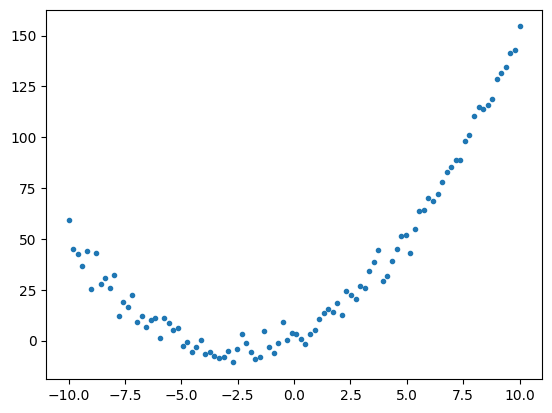

In [37]:
def create_data(n_points):
    x = np.linspace(-10, 10, n_points)
    y = x**2 + 5*x + 1 + 5* np.random.randn(n_points)
    return x, y

x, y = create_data(100)
plt.plot(x,y, '.')

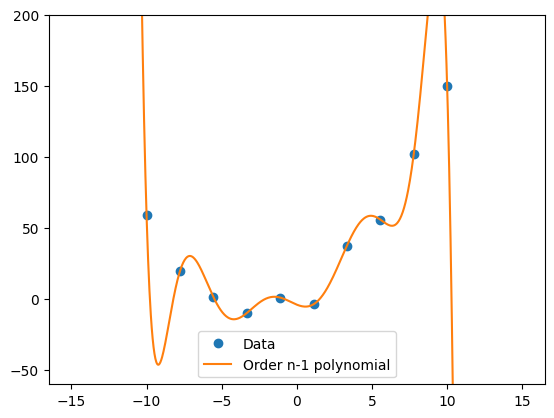

In [40]:
np.random.seed(1)
order =10
# Create models
model = pipeline.Pipeline([
    ('poly', preprocessing.PolynomialFeatures(degree=order-1)),
    ('scaler', preprocessing.StandardScaler()),
    ('model', linear_model.LinearRegression())
    ])

x, y = create_data(order)

model.fit(x.reshape(-1,1), y.reshape(-1,1))

# Create test data 
x_pred = np.linspace(-15, 15, 1000).reshape(-1, 1)

y_pred = model.predict(x_pred)

plt.plot(x,y, 'o', label='Data')
plt.plot(x_pred, y_pred, label='Order n-1 polynomial')
plt.ylim(-60, 200)
plt.legend()


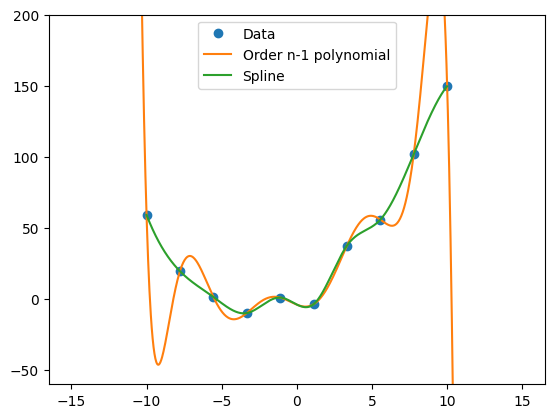

In [41]:
np.random.seed(1)
order = 10
# Create models
model = pipeline.Pipeline([
    ('poly', preprocessing.PolynomialFeatures(degree=order-1)),
    ('scaler', preprocessing.StandardScaler()),
    ('model', linear_model.LinearRegression())
    ])

x, y = create_data(order)

model.fit(x.reshape(-1,1), y.reshape(-1,1))
xs = np.arange(-10,10, 0.01)
y_spline = interpolate.CubicSpline(x, y,)(xs)
# Create test data 
x_pred = np.linspace(-15, 15, 1000).reshape(-1, 1)

y_pred = model.predict(x_pred)

plt.plot(x,y, 'o', label='Data')
plt.plot(x_pred, y_pred, label='Order n-1 polynomial')
plt.plot(xs, y_spline, label='Spline')
plt.ylim(-60, 200)
plt.legend()